# **DELIVERY PERFORMANCE ANALYSIS**
## Step-by-Step Guide

In [14]:
#Importing Required Libraries
#Loading all the Python libraries we need for analysis
#initial imports
import pandas as pd
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path
from datetime import datetime, timedelta

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [16]:
#Loading CSV Data and Reading the CSV files into a pandas DataFrame

# Loading the data
# Define the file paths for your four CSV files
file_path_1 = 'delivery_data/sample_data1.csv'
file_path_2 = 'delivery_data/sample_data2.csv'
file_path_3 = 'delivery_data/sample_data3.csv'
file_path_4 = 'delivery_data/sample_data4.csv'

# Reading each CSV file into a separate DataFrame
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)
df3 = pd.read_csv(file_path_3)
df4 = pd.read_csv(file_path_4)

# Joining the DataFrames into a single DataFrame
# Useing pandas.concat() function to concatenate DataFrames along a particular axis.
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Displaying basic information
print("Dataset loaded successfully!")
print(f"Total number of rows: {len(combined_df)}")
print(f"Total number of columns: {len(combined_df.columns)}")
print("\nFirst 5 rows of data:")

#combined_df = combined_df.drop(combined_df.columns[0], axis=1)
combined_df.head()

Dataset loaded successfully!
Total number of rows: 59529
Total number of columns: 22

First 5 rows of data:


,LOAD_ID,BOOKING_DT,BOOKING_TM,ORIG,PKUP_ST_DT,PKUP_ST_TM,PKUP_END_DT,PKUP_END_TM,PKUP_ARRIVAL_ACT_DT,PKUP_ARRIVAL_ACT_TM,...,DEST,DLVERY_ST_DT,DLVERY_ST_TM,DLVERY_END_DT,DLVERY_END_TM,DLVERY_ARRIVAL_ACT_DT,DLVERY_ARRIVAL_ACT_TM,DLVERY_DEPARTURE_ACT_DT,DLVERY_DEPARTURE_ACT_TM,MILEAGE
0,1,20200903,1312,2075615,20200905,700,20200905,700,20200905,1015,...,1047897,20200909,1,20200910,130,20200910,102,20200910,352,1034
1,2,20201001,845,2059975,20201002,1100,20201002,1100,20201002,907,...,659549,20201005,1800,20201005,1800,20201005,1106,20201005,1107,828
2,3,20210216,1411,1041675,20210226,830,20210226,2000,20210226,1520,...,1135821,20210310,1700,20210310,1700,20210310,1532,20210310,1818,529
3,4,20200524,1000,1128953,20200526,700,20200527,2000,20200527,1334,...,992647,20200601,1100,20200601,1100,20200601,1040,20200601,1548,799
4,5,20200529,1458,1308541,20200605,1100,20200605,1100,20200605,1008,...,679813,20200608,1200,20200608,1200,20200608,1200,20200608,1200,1365


In [19]:
#Exploring the Data
# ----------------------------------------------------------------------------
# Initial Data Exploration
# Looking at the structure and content of our data

# Show column names
print("Column Names:")
print(combined_df.columns.tolist())

# Show data types
print("\nData Types:")
print(combined_df.dtypes)

# Check for missing values
print("\nMissing Values Count:")
print(combined_df.isnull().sum())

Column Names:
['LOAD_ID', 'BOOKING_DT', 'BOOKING_TM', 'ORIG', 'PKUP_ST_DT', 'PKUP_ST_TM', 'PKUP_END_DT', 'PKUP_END_TM', 'PKUP_ARRIVAL_ACT_DT', 'PKUP_ARRIVAL_ACT_TM', 'PKUP_DEPARTURE_ACT_DT', 'PKUP_DEPARTURE_ACT_TM', 'DEST', 'DLVERY_ST_DT', 'DLVERY_ST_TM', 'DLVERY_END_DT', 'DLVERY_END_TM', 'DLVERY_ARRIVAL_ACT_DT', 'DLVERY_ARRIVAL_ACT_TM', 'DLVERY_DEPARTURE_ACT_DT', 'DLVERY_DEPARTURE_ACT_TM', 'MILEAGE']

Data Types:
LOAD_ID                     int64
BOOKING_DT                  int64
BOOKING_TM                  int64
ORIG                        int64
PKUP_ST_DT                  int64
PKUP_ST_TM                  int64
PKUP_END_DT                 int64
PKUP_END_TM                 int64
PKUP_ARRIVAL_ACT_DT        object
PKUP_ARRIVAL_ACT_TM        object
PKUP_DEPARTURE_ACT_DT      object
PKUP_DEPARTURE_ACT_TM      object
DEST                       object
DLVERY_ST_DT                int64
DLVERY_ST_TM                int64
DLVERY_END_DT               int64
DLVERY_END_TM               int64
DLVE

In [21]:
#Converting Date and Time Columns
# ----------------------------------------------------------------------------
# Converting Dates and Times to DateTime Format
# Combining date and time columns into proper datetime objects

# Booking datetime
combined_df['booking_datetime'] = pd.to_datetime(
    combined_df['BOOKING_DT'].astype(str) + ' ' + combined_df['BOOKING_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Pickup start datetime
combined_df['pickup_start_datetime'] = pd.to_datetime(
    combined_df['PKUP_ST_DT'].astype(str) + ' ' + combined_df['PKUP_ST_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Pickup end datetime
combined_df['pickup_end_datetime'] = pd.to_datetime(
    combined_df['PKUP_END_DT'].astype(str) + ' ' + combined_df['PKUP_END_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Pickup actual arrival
combined_df['pickup_arrival_actual'] = pd.to_datetime(
    combined_df['PKUP_ARRIVAL_ACT_DT'].astype(str) + ' ' + combined_df['PKUP_ARRIVAL_ACT_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Pickup actual departure
combined_df['pickup_departure_actual'] = pd.to_datetime(
    combined_df['PKUP_DEPARTURE_ACT_DT'].astype(str) + ' ' + combined_df['PKUP_DEPARTURE_ACT_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Delivery start datetime
combined_df['delivery_start_datetime'] = pd.to_datetime(
    combined_df['DLVERY_ST_DT'].astype(str) + ' ' + combined_df['DLVERY_ST_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Delivery end datetime (this is our deadline!)
combined_df['delivery_end_datetime'] = pd.to_datetime(
    combined_df['DLVERY_END_DT'].astype(str) + ' ' + combined_df['DLVERY_END_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Delivery actual arrival
combined_df['delivery_arrival_actual'] = pd.to_datetime(
    combined_df['DLVERY_ARRIVAL_ACT_DT'].astype(str) + ' ' + combined_df['DLVERY_ARRIVAL_ACT_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

# Delivery actual departure
combined_df['delivery_departure_actual'] = pd.to_datetime(
    combined_df['DLVERY_DEPARTURE_ACT_DT'].astype(str) + ' ' + combined_df['DLVERY_DEPARTURE_ACT_TM'].astype(str).str.zfill(4),
    format='%Y%m%d %H%M',
    errors='coerce'
)

print("✓ All datetime columns created successfully!")
print(f"\nExample of converted datetime:")
print(f"First delivery actual arrival: {combined_df['delivery_arrival_actual'].iloc[0]}")


✓ All datetime columns created successfully!

Example of converted datetime:
First delivery actual arrival: 2020-09-10 01:02:00


In [22]:
 # Cleaning the Data
# ----------------------------------------------------------------------------
# Removing Records with Missing Delivery Data
# We need complete delivery information for our analysis

# Count rows before cleaning
rows_before = len(combined_df)

# Remove rows where we don't have delivery arrival or delivery end time
combined_df = combined_df.dropna(subset=['delivery_arrival_actual', 'delivery_end_datetime'])

# Count rows after cleaning
rows_after = len(combined_df)
rows_removed = rows_before - rows_after

print(f"Rows before cleaning: {rows_before}")
print(f"Rows after cleaning: {rows_after}")
print(f"Rows removed: {rows_removed}")
print("\n✓ Data cleaning complete!")

Rows before cleaning: 59529
Rows after cleaning: 59100
Rows removed: 429

✓ Data cleaning complete!


In [24]:
# Calculating Key Metrics
# ----------------------------------------------------------------------------
# Calculating Performance Metrics
# Creating columns for delivery delay and on-time status

# Calculating delivery delay in hours
# Negative = early, Positive = late
combined_df['delivery_delay_hours'] = (combined_df['delivery_arrival_actual'] - combined_df['delivery_end_datetime']).dt.total_seconds() / 3600

# Determine if delivery was on time (True/False)
# On time = arrived before or at the end of the delivery window
combined_df['is_on_time'] = combined_df['delivery_delay_hours'] <= 0

# Calculate pickup dwell time (time spent at pickup location)
combined_df['pickup_dwell_hours'] = (combined_df['pickup_departure_actual'] - combined_df['pickup_arrival_actual']).dt.total_seconds() / 3600

print("✓ Performance metrics calculated!")
print(f"\nExample for first load:")
print(f"Delivery delay: {combined_df['delivery_delay_hours'].iloc[0]:.2f} hours")
print(f"On time? {combined_df['is_on_time'].iloc[0]}")
print(f"Pickup dwell time: {combined_df['pickup_dwell_hours'].iloc[0]:.2f} hours")

✓ Performance metrics calculated!

Example for first load:
Delivery delay: -0.47 hours
On time? True
Pickup dwell time: 3.37 hours


In [26]:
#Overall Statistics
# ----------------------------------------------------------------------------
#Calculating Overall Performance Statistics
#Getting a summary of our dataset

print("=" * 60)
print("OVERALL DATASET STATISTICS")
print("=" * 60)

print(f"\nTotal number of loads: {len(combined_df):,}")
print(f"Number of origin locations: {combined_df['ORIG'].nunique()}")
print(f"Number of destination locations: {combined_df['DEST'].nunique()}")
print(f"Average mileage per load: {combined_df['MILEAGE'].mean():.0f} miles")
print(f"Date range: {combined_df['delivery_arrival_actual'].min().date()} to {combined_df['delivery_arrival_actual'].max().date()}")

OVERALL DATASET STATISTICS

Total number of loads: 59,100
Number of origin locations: 1676
Number of destination locations: 3182
Average mileage per load: 459 miles
Date range: 2020-05-02 to 2021-12-13


In [27]:
# Answering Question 2 - On-Time Performance
# ----------------------------------------------------------------------------
# QUESTION 2 - Does the Data Support the Customer's Claim?
# Customer claims 90% on-time performance with delays of only a couple hours

print("=" * 60)
print("QUESTION 2: CUSTOMER CLAIM VALIDATION")
print("=" * 60)

# Calculate on-time performance
total_loads = len(combined_df)
on_time_loads = combined_df['is_on_time'].sum()
on_time_percentage = (on_time_loads / total_loads) * 100

print(f"\n📊 ON-TIME PERFORMANCE:")
print(f"   Total loads: {total_loads:,}")
print(f"   On-time deliveries: {on_time_loads:,}")
print(f"   On-time percentage: {on_time_percentage:.1f}%")
print(f"\n   Customer claims 90% on-time")
print(f"   Result: {'✓ CLAIM SUPPORTED' if on_time_percentage >= 90 else '✗ CLAIM NOT SUPPORTED'}")

# Analyze late deliveries
late_deliveries = combined_df[combined_df['is_on_time'] == False]
late_count = len(late_deliveries)

if late_count > 0:
    avg_delay = late_deliveries['delivery_delay_hours'].mean()
    max_delay = late_deliveries['delivery_delay_hours'].max()
    median_delay = late_deliveries['delivery_delay_hours'].median()
    
    print(f"\n📊 LATE DELIVERY ANALYSIS:")
    print(f"   Late deliveries: {late_count:,} ({100 - on_time_percentage:.1f}%)")
    print(f"   Average delay: {avg_delay:.1f} hours")
    print(f"   Median delay: {median_delay:.1f} hours")
    print(f"   Maximum delay: {max_delay:.1f} hours")
    print(f"\n   Customer claims 'couple of hours at most'")
    print(f"   Result: {'✓ CLAIM SUPPORTED' if avg_delay <= 2 else '✗ CLAIM NOT SUPPORTED'}")

QUESTION 2: CUSTOMER CLAIM VALIDATION

📊 ON-TIME PERFORMANCE:
   Total loads: 59,100
   On-time deliveries: 44,302
   On-time percentage: 75.0%

   Customer claims 90% on-time
   Result: ✗ CLAIM NOT SUPPORTED

📊 LATE DELIVERY ANALYSIS:
   Late deliveries: 14,798 (25.0%)
   Average delay: 15.3 hours
   Median delay: 5.5 hours
   Maximum delay: 8824.0 hours

   Customer claims 'couple of hours at most'
   Result: ✗ CLAIM NOT SUPPORTED


/var/folders/x2/vmvr8mcn0ql0f0d4rx42b_jr0000gn/T/ipykernel_75103/1890058551.py:73: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from current font.
  plt.tight_layout()
/Users/victormieres/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


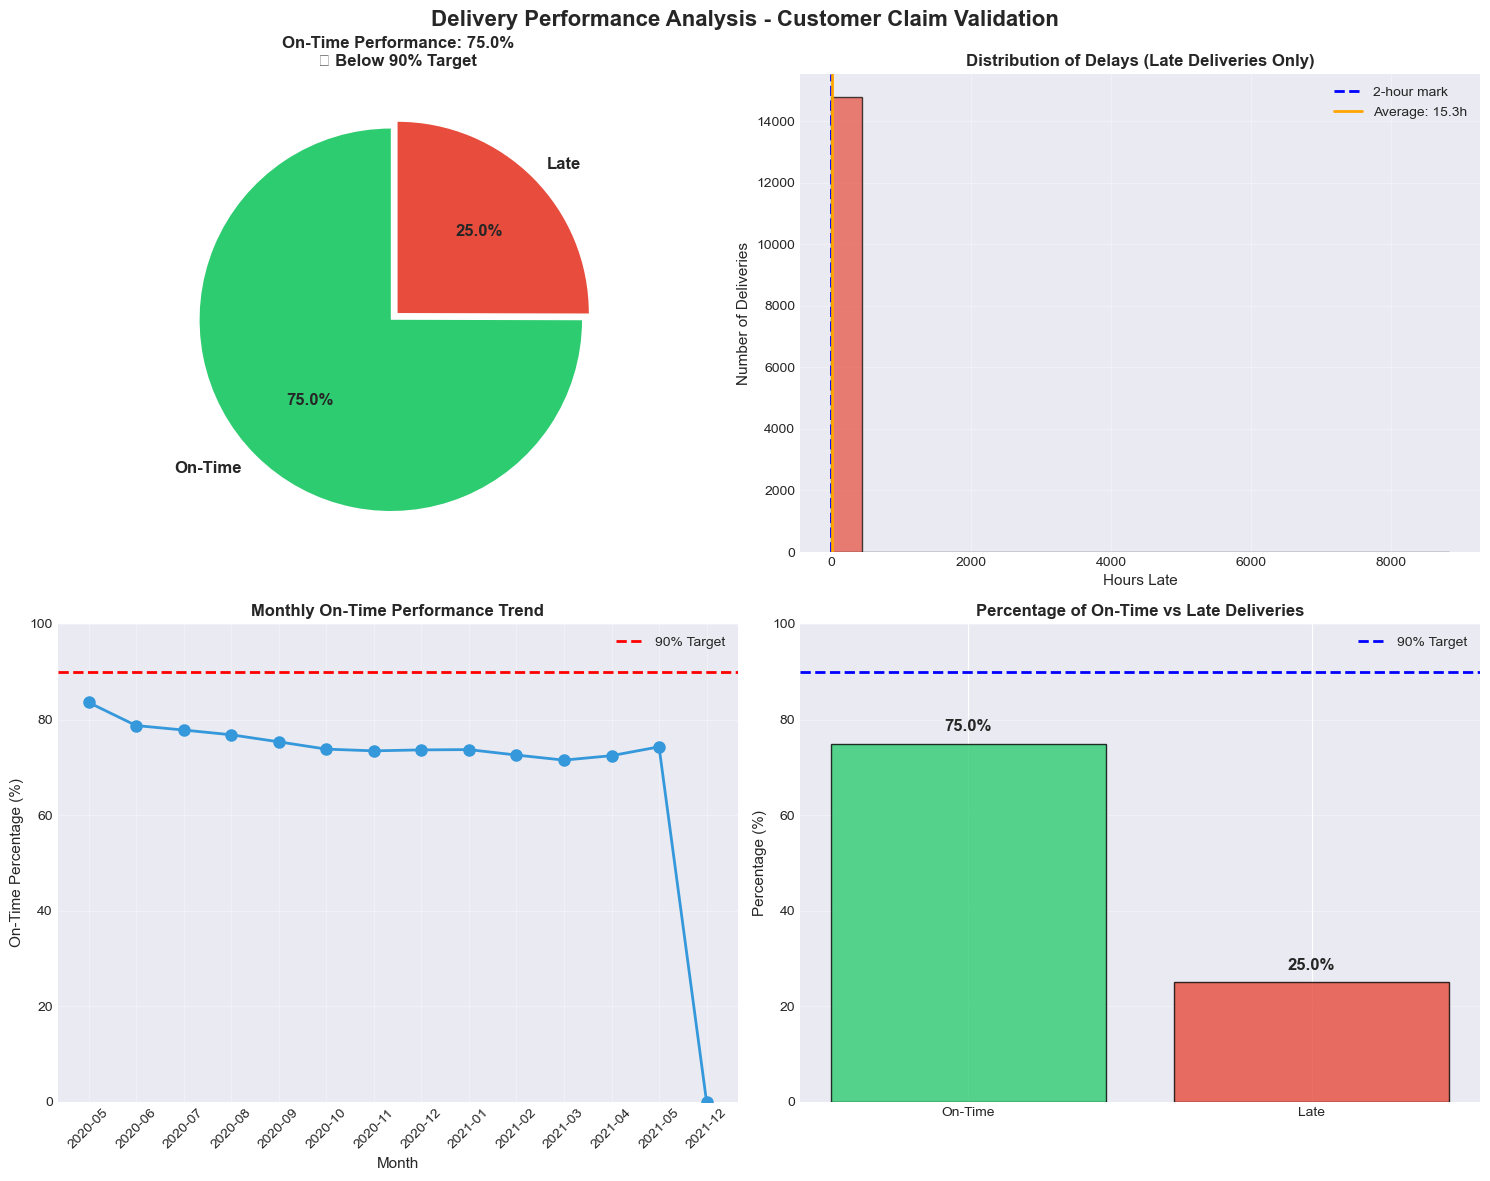


✓ Visualization created successfully!


In [28]:
# Creating Visualization for Question 2
# ----------------------------------------------------------------------------
# Visualizing On-Time Performance
# Description: Creating charts to show delivery performance

# Creating figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Delivery Performance Analysis - Customer Claim Validation', fontsize=16, fontweight='bold')

# Chart 1: On-Time vs Late Pie Chart
ax1 = axes[0, 0]
on_time_counts = [on_time_loads, late_count]
labels = ['On-Time', 'Late']
colors = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)

ax1.pie(on_time_counts, labels=labels, autopct='%1.1f%%', colors=colors, 
        explode=explode, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title(f'On-Time Performance: {on_time_percentage:.1f}%\n{"✓ Meets 90% Target" if on_time_percentage >= 90 else "✗ Below 90% Target"}', 
              fontsize=12, fontweight='bold')

# Chart 2: Delay Distribution (for late deliveries only)
ax2 = axes[0, 1]
if late_count > 0:
    ax2.hist(late_deliveries['delivery_delay_hours'], bins=20, color='#e74c3c', 
             alpha=0.7, edgecolor='black')
    ax2.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='2-hour mark')
    ax2.axvline(x=avg_delay, color='orange', linestyle='-', linewidth=2, 
                label=f'Average: {avg_delay:.1f}h')
    ax2.set_xlabel('Hours Late', fontsize=11)
    ax2.set_ylabel('Number of Deliveries', fontsize=11)
    ax2.set_title('Distribution of Delays (Late Deliveries Only)', fontsize=12, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

# Chart 3: Monthly Performance Trend
ax3 = axes[1, 0]
combined_df['month'] = combined_df['delivery_arrival_actual'].dt.to_period('M').astype(str)
monthly_performance = combined_df.groupby('month')['is_on_time'].mean() * 100

ax3.plot(range(len(monthly_performance)), monthly_performance.values, 
         marker='o', linewidth=2, markersize=8, color='#3498db')
ax3.axhline(y=90, color='red', linestyle='--', linewidth=2, label='90% Target')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('On-Time Percentage (%)', fontsize=11)
ax3.set_title('Monthly On-Time Performance Trend', fontsize=12, fontweight='bold')
ax3.set_xticks(range(len(monthly_performance)))
ax3.set_xticklabels(monthly_performance.index, rotation=45)
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 100)

# Chart 4: On-Time vs Late Bar Chart
ax4 = axes[1, 1]
categories = ['On-Time', 'Late']
values = [on_time_percentage, 100 - on_time_percentage]
colors_bar = ['#2ecc71', '#e74c3c']

bars = ax4.bar(categories, values, color=colors_bar, alpha=0.8, edgecolor='black')
ax4.axhline(y=90, color='blue', linestyle='--', linewidth=2, label='90% Target')
ax4.set_ylabel('Percentage (%)', fontsize=11)
ax4.set_title('Percentage of On-Time vs Late Deliveries', fontsize=12, fontweight='bold')
ax4.set_ylim(0, 100)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Visualization created successfully!")

In [29]:
# Answering Question 3 - Problem Locations
# ----------------------------------------------------------------------------
# QUESTION 3 - Identify Problem Delivery Locations
# Description: Finding worst performing destinations (minimum 10 observations)

print("=" * 60)
print("QUESTION 3: PROBLEM LOCATION ANALYSIS")
print("=" * 60)

# Set minimum observations requirement
min_observations = 10

# Calculate statistics for each destination
location_stats = combined_df.groupby('DEST').agg({
    'LOAD_ID': 'count',  # Total loads
    'is_on_time': 'sum',  # On-time loads
    'delivery_delay_hours': ['mean', 'std']  # Average and standard deviation of delays
}).reset_index()

# Flatten column names
location_stats.columns = ['DEST', 'total_loads', 'on_time_loads', 'avg_delay', 'std_delay']

# Calculate on-time percentage
location_stats['on_time_percentage'] = (location_stats['on_time_loads'] / location_stats['total_loads']) * 100

# Filter to only locations with at least 10 observations
qualified_locations = location_stats[location_stats['total_loads'] >= min_observations].copy()

print(f"\nTotal unique destinations: {len(location_stats)}")
print(f"Destinations with ≥ {min_observations} loads: {len(qualified_locations)}")

# Part A: Bottom 5 by on-time percentage
print(f"\n{'='*60}")
print("PART A: BOTTOM 5 DESTINATIONS BY ON-TIME PERCENTAGE")
print('='*60)

bottom_5_ontime = qualified_locations.nsmallest(5, 'on_time_percentage')

for i, row in bottom_5_ontime.iterrows():
    print(f"\n{list(bottom_5_ontime.index).index(i) + 1}. Destination: {row['DEST']}")
    print(f"   On-Time Percentage: {row['on_time_percentage']:.1f}%")
    print(f"   Total Loads: {row['total_loads']:.0f}")
    print(f"   On-Time Loads: {row['on_time_loads']:.0f}")

# Part B: Top 5 by standard deviation
print(f"\n{'='*60}")
print("PART B: TOP 5 DESTINATIONS BY DELAY VARIABILITY")
print("(Highest Standard Deviation = Most Unpredictable)")
print('='*60)

top_5_variability = qualified_locations.nlargest(5, 'std_delay')

for i, row in top_5_variability.iterrows():
    print(f"\n{list(top_5_variability.index).index(i) + 1}. Destination: {row['DEST']}")
    print(f"   Standard Deviation: {row['std_delay']:.2f} hours")
    print(f"   Average Delay: {row['avg_delay']:.2f} hours")
    print(f"   Total Loads: {row['total_loads']:.0f}")

QUESTION 3: PROBLEM LOCATION ANALYSIS

Total unique destinations: 3182
Destinations with ≥ 10 loads: 583

PART A: BOTTOM 5 DESTINATIONS BY ON-TIME PERCENTAGE

1. Destination: 499477
   On-Time Percentage: 0.0%
   Total Loads: 11
   On-Time Loads: 0

2. Destination: 906049
   On-Time Percentage: 14.3%
   Total Loads: 14
   On-Time Loads: 2

3. Destination: 1288141
   On-Time Percentage: 16.7%
   Total Loads: 12
   On-Time Loads: 2

4. Destination: 594983
   On-Time Percentage: 20.0%
   Total Loads: 20
   On-Time Loads: 4

5. Destination: 971635
   On-Time Percentage: 25.0%
   Total Loads: 20
   On-Time Loads: 5

PART B: TOP 5 DESTINATIONS BY DELAY VARIABILITY
(Highest Standard Deviation = Most Unpredictable)

1. Destination: 1012707
   Standard Deviation: 1513.75 hours
   Average Delay: 257.21 hours
   Total Loads: 34

2. Destination: 53363
   Standard Deviation: 766.84 hours
   Average Delay: 77.90 hours
   Total Loads: 90

3. Destination: 1302285
   Standard Deviation: 525.75 hours
  

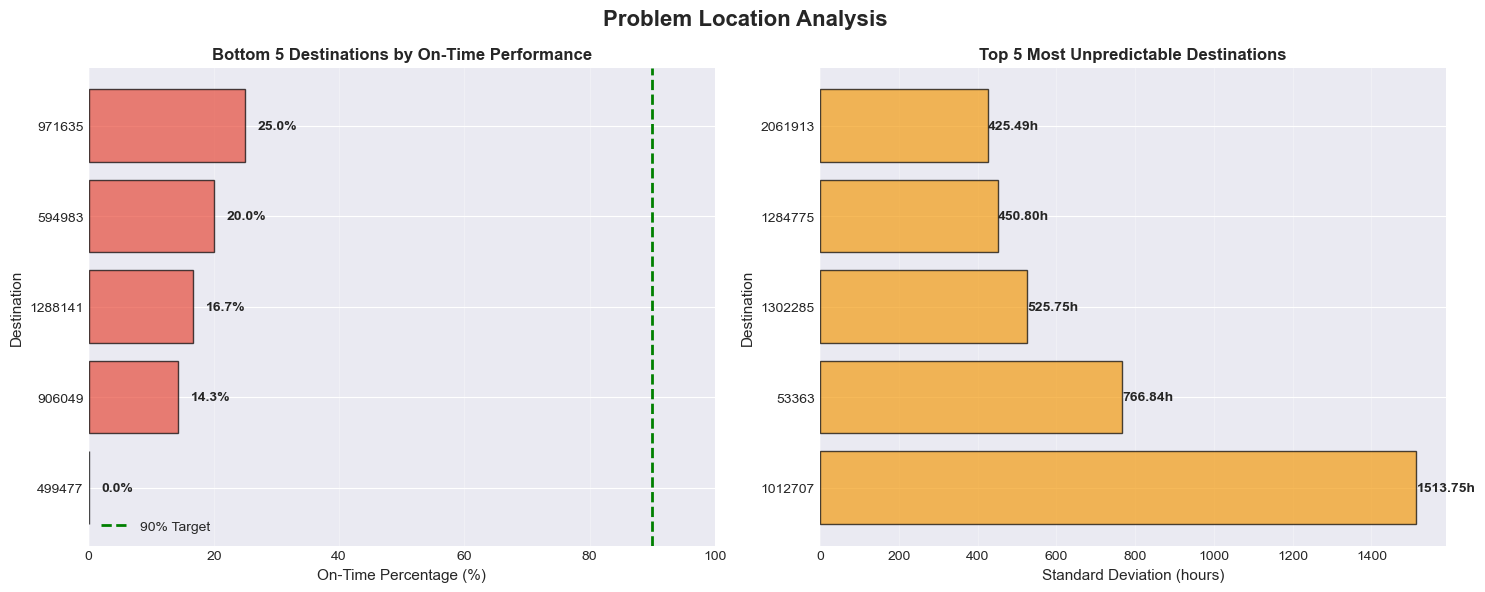


✓ Problem location visualizations created!


In [30]:
# Visualizing Problem Locations
# ----------------------------------------------------------------------------
# Visualizing Problem Locations
# Description: Creating charts for the worst performing locations

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Problem Location Analysis', fontsize=16, fontweight='bold')

# Chart 1: Bottom 5 On-Time Performance
ax1 = axes[0]
destinations = bottom_5_ontime['DEST'].astype(str).tolist()
on_time_pcts = bottom_5_ontime['on_time_percentage'].tolist()

bars1 = ax1.barh(destinations, on_time_pcts, color='#e74c3c', alpha=0.7, edgecolor='black')
ax1.axvline(x=90, color='green', linestyle='--', linewidth=2, label='90% Target')
ax1.set_xlabel('On-Time Percentage (%)', fontsize=11)
ax1.set_ylabel('Destination', fontsize=11)
ax1.set_title('Bottom 5 Destinations by On-Time Performance', fontsize=12, fontweight='bold')
ax1.set_xlim(0, 100)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar in bars1:
    width = bar.get_width()
    ax1.text(width + 2, bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', ha='left', va='center', fontsize=10, fontweight='bold')

# Chart 2: Top 5 Delay Variability
ax2 = axes[1]
destinations2 = top_5_variability['DEST'].astype(str).tolist()
std_devs = top_5_variability['std_delay'].tolist()

bars2 = ax2.barh(destinations2, std_devs, color='#f39c12', alpha=0.7, edgecolor='black')
ax2.set_xlabel('Standard Deviation (hours)', fontsize=11)
ax2.set_ylabel('Destination', fontsize=11)
ax2.set_title('Top 5 Most Unpredictable Destinations', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add value labels
for bar in bars2:
    width = bar.get_width()
    ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}h', ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Problem location visualizations created!")

In [33]:
# Answering Question 4 - Diagnostic Test Setup
# ----------------------------------------------------------------------------
# QUESTION 4 - Diagnostic Test for Worst Location
# Description: Testing if delivery windows are realistic for the worst performing location

print("=" * 60)
print("QUESTION 4: DIAGNOSTIC TEST - WORST LOCATION")
print("=" * 60)

# Get the worst performing destination
worst_destination = bottom_5_ontime.iloc[0]['DEST']
worst_location_data = combined_df[combined_df['DEST'] == worst_destination].copy()

print(f"\nAnalyzing Destination: {worst_destination}")
print(f"Total loads to this destination: {len(worst_location_data)}")
print(f"Current on-time performance: {bottom_5_ontime.iloc[0]['on_time_percentage']:.1f}%")

# Calculate 90th percentile dwell time for each origin location
print("\n📊 Calculating 90th percentile dwell times by origin...")
origin_dwell_p90 = combined_df.groupby('ORIG')['pickup_dwell_hours'].quantile(0.90)

print(f"✓ Calculated 90th percentile dwell times for {len(origin_dwell_p90)} origins")

QUESTION 4: DIAGNOSTIC TEST - WORST LOCATION

Analyzing Destination: 499477
Total loads to this destination: 11
Current on-time performance: 0.0%

📊 Calculating 90th percentile dwell times by origin...
✓ Calculated 90th percentile dwell times for 1676 origins


In [34]:
# Running Diagnostic Test
# ----------------------------------------------------------------------------
# Run the Diagnostic Test
# Description: Simulating optimal delivery times and compare to proposed windows

# Assumptions for the test
TRAVEL_SPEED = 40  # miles per hour

print("\n" + "=" * 60)
print("RUNNING DIAGNOSTIC TEST")
print("=" * 60)
print(f"\nAssumptions:")
print(f"  • Driver arrives at pickup at START of window")
print(f"  • Dwell time = 90th percentile for that origin")
print(f"  • Travel speed = {TRAVEL_SPEED} mph")

# Run the diagnostic test for each load
results = []

for idx, load in worst_location_data.iterrows():
    # Step 1: Start at pickup window start time
    optimal_pickup_arrival = load['pickup_start_datetime']
    
    # Step 2: Get 90th percentile dwell time for this origin
    origin = load['ORIG']
    if origin in origin_dwell_p90.index:
        dwell_time = origin_dwell_p90[origin]
    else:
        # If origin not found, use overall 90th percentile
        dwell_time = df['pickup_dwell_hours'].quantile(0.90)
    
    # Step 3: Calculate departure time from pickup
    optimal_pickup_departure = optimal_pickup_arrival + timedelta(hours=dwell_time)
    
    # Step 4: Calculate travel time
    mileage = load['MILEAGE']
    travel_hours = mileage / TRAVEL_SPEED
    
    # Step 5: Calculate optimal delivery arrival
    optimal_delivery_arrival = optimal_pickup_departure + timedelta(hours=travel_hours)
    
    # Step 6: Compare to proposed delivery window end
    delivery_window_end = load['delivery_end_datetime']
    time_difference_hours = (optimal_delivery_arrival - delivery_window_end).total_seconds() / 3600
    
    # Store results
    results.append({
        'LOAD_ID': load['LOAD_ID'],
        'optimal_delivery_arrival': optimal_delivery_arrival,
        'window_end': delivery_window_end,
        'difference_hours': time_difference_hours,
        'would_be_on_time': time_difference_hours <= 0
    })

# Convert results to DataFrame
diagnostic_df = pd.DataFrame(results)

# Calculate summary statistics
total_tested = len(diagnostic_df)
would_be_on_time = diagnostic_df['would_be_on_time'].sum()
would_be_on_time_pct = (would_be_on_time / total_tested) * 100
avg_difference = diagnostic_df['difference_hours'].mean()
median_difference = diagnostic_df['difference_hours'].median()

print(f"\n{'='*60}")
print("DIAGNOSTIC TEST RESULTS")
print('='*60)
print(f"\nTotal loads tested: {total_tested}")
print(f"Would be on-time with optimal execution: {would_be_on_time} ({would_be_on_time_pct:.1f}%)")
print(f"Would still be late: {total_tested - would_be_on_time} ({100 - would_be_on_time_pct:.1f}%)")
print(f"\nAverage time difference: {avg_difference:.2f} hours")
print(f"Median time difference: {median_difference:.2f} hours")
print(f"  (Negative = would arrive early, Positive = would arrive late)")

print(f"\n{'='*60}")
print("CONCLUSION:")
print('='*60)
if would_be_on_time_pct >= 80:
    print("✓ Delivery windows appear REALISTIC")
    print("  Most loads could meet the window with optimal execution.")
    print("  Problem likely lies in operational execution, not window design.")
else:
    print("✗ Delivery windows appear UNREALISTIC")
    print("  Even with perfect execution, many loads cannot meet windows.")
    print("  Recommend reviewing and adjusting delivery time windows.")


RUNNING DIAGNOSTIC TEST

Assumptions:
  • Driver arrives at pickup at START of window
  • Dwell time = 90th percentile for that origin
  • Travel speed = 40 mph

DIAGNOSTIC TEST RESULTS

Total loads tested: 11
Would be on-time with optimal execution: 11 (100.0%)
Would still be late: 0 (0.0%)

Average time difference: -2.83 hours
Median time difference: -1.38 hours
  (Negative = would arrive early, Positive = would arrive late)

CONCLUSION:
✓ Delivery windows appear REALISTIC
  Most loads could meet the window with optimal execution.
  Problem likely lies in operational execution, not window design.
